In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\chinmay\projects\stock_data.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Name
0,NaN,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,NaN,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,NaN,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,NaN,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,NaN,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


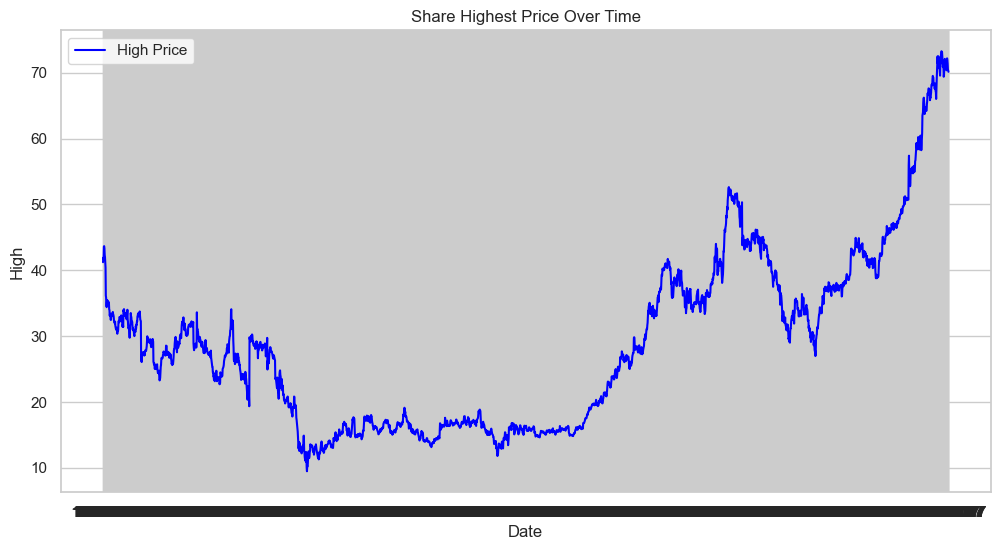

In [6]:
sns.set(style = "whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data = df,x='Date',y='High' , label='High Price', color ='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

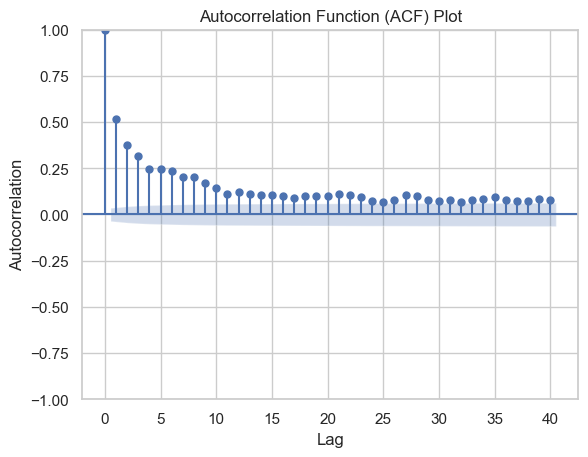

In [15]:

plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7671404880535944
p-value: 0.9910868050318213
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


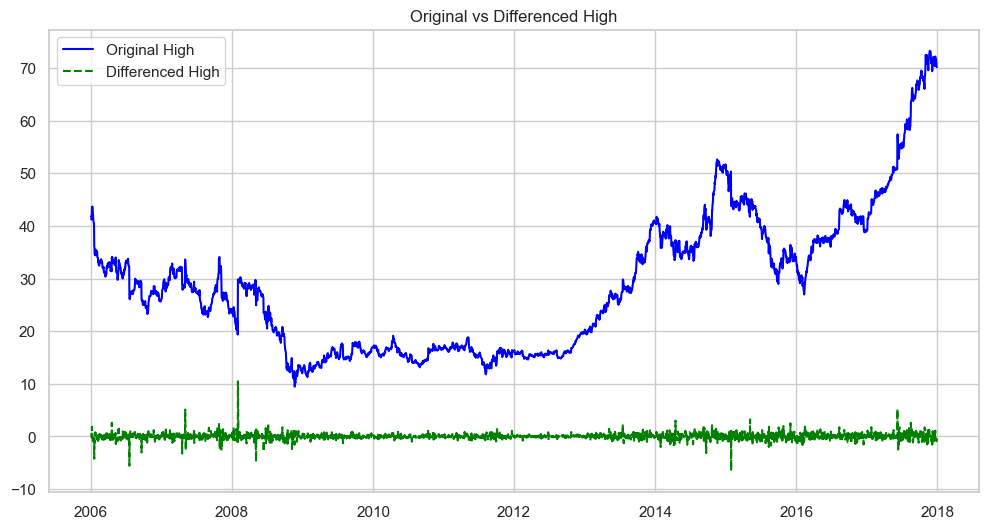

In [17]:
df['high_diff'] = df['High'].diff()
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

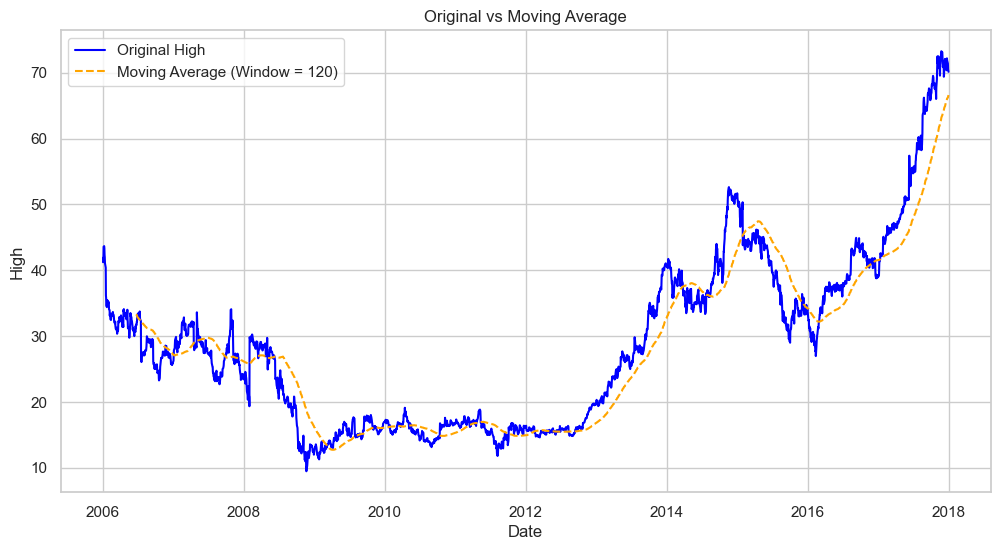

In [19]:
window_size = 120

# Calculate the moving average (rolling mean) over the window size
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plot the original 'High' and the smoothed 'High' (moving average)
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window = {window_size})', linestyle='--', color='orange')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()

# Show the plot
plt.show()


In [20]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [21]:
df.dropna(subset = ['high_diff'], inplace =True)
df['high_diff'].head()

Date
2006-01-04    0.68
2006-01-05   -0.17
2006-01-06    1.84
2006-01-09    0.09
2006-01-10   -0.32
Name: high_diff, dtype: float64

In [22]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['high_diff'])
print('ADF Statistic:',result[0])
print('p-value:', result[1])
print('Critical Values:' , result[4])

ADF Statistic: -12.148367478343252
p-value: 1.5912766134148354e-22
Critical Values: {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


In [23]:
df.head()

,Open,High,Low,Close,Volume,Name,high_diff,high_smoothed
Date,,,,,,,,
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,0.68,NaN
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,-0.17,NaN
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,1.84,NaN
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,0.09,NaN
2006-01-10,42.96,43.34,42.34,42.98,16288580,AABA,-0.32,NaN
